# Fake New Dectection

In [1]:
import numpy as np
import pandas as pd
import re,string,unicodedata
import os

# NLP Libs
import nltk
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
#from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#ML Algos
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             matthews_corrcoef,
                             cohen_kappa_score,
                             roc_auc_score)

In [2]:
# Import our data

fake = pd.read_csv("./dataset/ISOT_News_dataset/Fake.csv")
true = pd.read_csv("./dataset/ISOT_News_dataset/True.csv")

# Data Analysis

In [3]:
true.sample(20)

,title,text,subject,date
20011,Russia's Lavrov and U.S. Tillerson discuss Syr...,MOSCOW (Reuters) - Russian Foreign Minister Se...,worldnews,"September 15, 2017"
981,FCC media rule rollback could usher in TV stat...,WASHINGTON (Reuters) - The Republican-led Fede...,politicsNews,"October 27, 2017"
8429,"Clinton Foundation to bar foreign, corporate f...",WASHINGTON (Reuters) - The Clinton Foundation ...,politicsNews,"August 18, 2016"
14059,Cambodia's Hun Sen warns his party it could st...,PHNOM PENH (Reuters) - Cambodian Prime Ministe...,worldnews,"November 23, 2017"
3673,"Traveling abroad, Trump struggles to escape cr...",RIYADH (Reuters) - President Donald Trump was ...,politicsNews,"May 20, 2017"
19755,Uganda police arrest youths who oppose fresh t...,KAMPALA (Reuters) - Ugandan police have arrest...,worldnews,"September 18, 2017"
20939,U.S. Virgin Islands seaports closed ahead of I...,HOUSTON (Reuters) - The U.S. Virgin Islands se...,worldnews,"September 5, 2017"
11929,Saudi-led air strikes kill 136 civilians in Ye...,GENEVA (Reuters) - Air strikes by the Saudi-le...,worldnews,"December 19, 2017"
21296,Hard-right German party tells Trump to tweet less,BERLIN (Reuters) - The hard-right Alternative ...,worldnews,"August 28, 2017"
8066,Senate clears way for $1.15 billion arms sale ...,WASHINGTON (Reuters) - The U.S. Senate cleared...,politicsNews,"September 21, 2016"


In [4]:
fake.sample(20)

,title,text,subject,date
1694,Donald Trump Just Used The World Trade Center...,It s become more than obvious that Donald Trum...,News,"April 24, 2017"
12917,H.S. Football Team Stages “Die-In” To Show Sup...,"Some 2,500 Americans Have Died in Afghanistan ...",politics,"Sep 25, 2016"
21250,TRUMP SPOKESPERSON Delivers A Knockout Punch T...,Trump Spokesperson Katrina Pierson: When was ...,left-news,"Dec 6, 2015"
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...
595,Trump Demands Mitch McConnell ‘Get Back to Wo...,"On Thursday, while Donald Trump was in the mid...",News,"August 10, 2017"
11594,"EXCLUSIVE Post-Election, Liberal Meltdown Expl...",If you re like me . . . it s probably been an ...,politics,"Feb 23, 2017"
20278,BREAKING: Fresno Police Release GRAPHIC Video ...,"The mainstream media, Hillary, Barack and Blac...",left-news,"Jul 14, 2016"
21417,BURIED BY MEDIA: Aide To Leftist US Congressma...,Just when you thought Muslims had cornered the...,left-news,"Oct 14, 2015"
9491,LIBERALS ARE GOING To Be Furious Over What Thi...,Thank God a hero with a gun emerged in Sutherl...,politics,"Nov 7, 2017"
18969,"TRUMP TO END FUNDING For Taxpayer-Funded, Left...",Forcing taxpaying Americans to fund liberal pr...,left-news,"Mar 16, 2017"


In [5]:
true.shape,fake.shape


((21417, 4), (23481, 4))

In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
# These dataframes do not currently have a category for whether they are true or fake.
# Let's create those before we combine the datasets

fake['label'] = 1
true['label'] = 0

In [9]:
# Now we'll merge the two datasets into a single dataframe

df = pd.concat([true,fake], ignore_index=True)

In [10]:
df.head(10)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


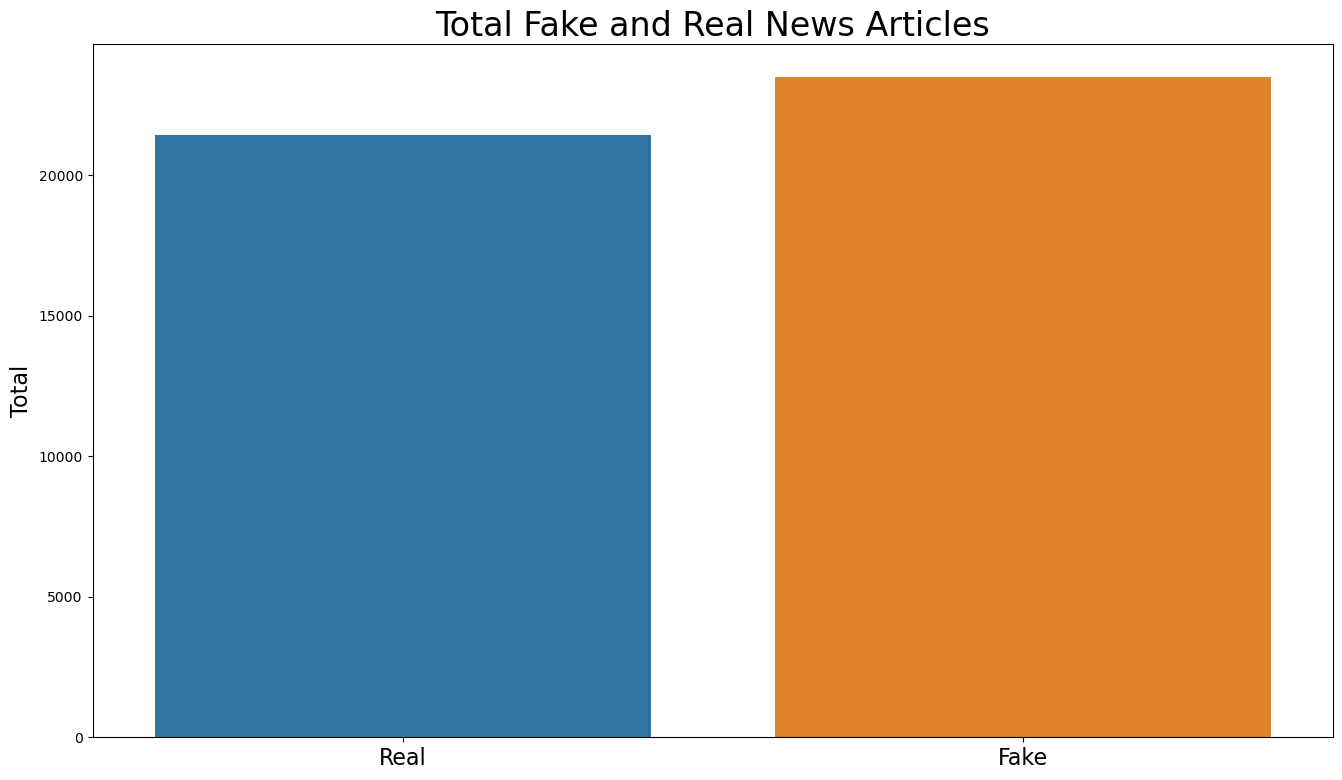

In [11]:
# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))

#sns.countplot(df.label)
sns.countplot(data=df, x='label')

plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([1, 0], ['Fake', 'Real'], fontsize=16)

plt.show()

In [12]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [13]:
print(df.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [15]:
#df=df.fillna(' ')
# Now we'll create the Corpus that will be used in our NLP model

# This will create a single column with all the relevant text

df['total']=df['title']+' '+df['text']
#df['total']=df['text']

In [16]:
df.head()

,title,text,subject,date,label,total
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Trump wants Postal Service to charge 'much mor...


In [17]:
df = df.drop(['title','text','subject', 'date'],axis = 1)

In [18]:
df.head()

,label,total
0,0,"As U.S. budget fight looms, Republicans flip t..."
1,0,U.S. military to accept transgender recruits o...
2,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,0,FBI Russia probe helped by Australian diplomat...
4,0,Trump wants Postal Service to charge 'much mor...


In [19]:
df.shape

(44898, 2)

# Cleaning and preprocessing

In [20]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [21]:
stop_words = stopwords.words('english')
lemmatizer=WordNetLemmatizer()
for index,row in df.iterrows():
    filter_sentence = ''

    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    words = nltk.word_tokenize(sentence) #tokenization
    words = [w.lower() for w in words if not w in stop_words]  #stopwords removal

    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

    df.loc[index,'total'] = filter_sentence

In [22]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=42)
df.head()

,label,total
22216,1,breaking gop chairman grassley ha had enough ...
27917,1,failed gop candidate remembered in hilarious ...
25007,1,mike pences new dc neighbor are hilariously t...
1377,0,california ag pledge defend birth control ins...
32476,1,az rancher living on usmexico border destroy ...


In [23]:
df = df.reset_index().drop(columns=['index'])

In [24]:
df.head(20)

,label,total
0,1,breaking gop chairman grassley ha had enough ...
1,1,failed gop candidate remembered in hilarious ...
2,1,mike pences new dc neighbor are hilariously t...
3,0,california ag pledge defend birth control ins...
4,1,az rancher living on usmexico border destroy ...
5,0,a private lawyer trump high court pick friend...
6,0,yemeni salafist imam killed aden source aden ...
7,0,fbi say witness u probe malaysia 1mdb fear sa...
8,1,an easy to read chart show how bernie sander ...
9,1,mma fighter jake shield embarrasses coward in...


In [25]:
df['label'].value_counts(normalize=True)

1    0.522985
0    0.477015
Name: label, dtype: float64

In [26]:
df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.54)).reset_index().drop(columns=['index'])

In [27]:
df['label'].value_counts(normalize=True)

1    0.522994
0    0.477006
Name: label, dtype: float64

In [28]:
#df.to_csv("./dataset/ISOT_News_dataset/cleaned_dataset_after_index_dropped.csv")

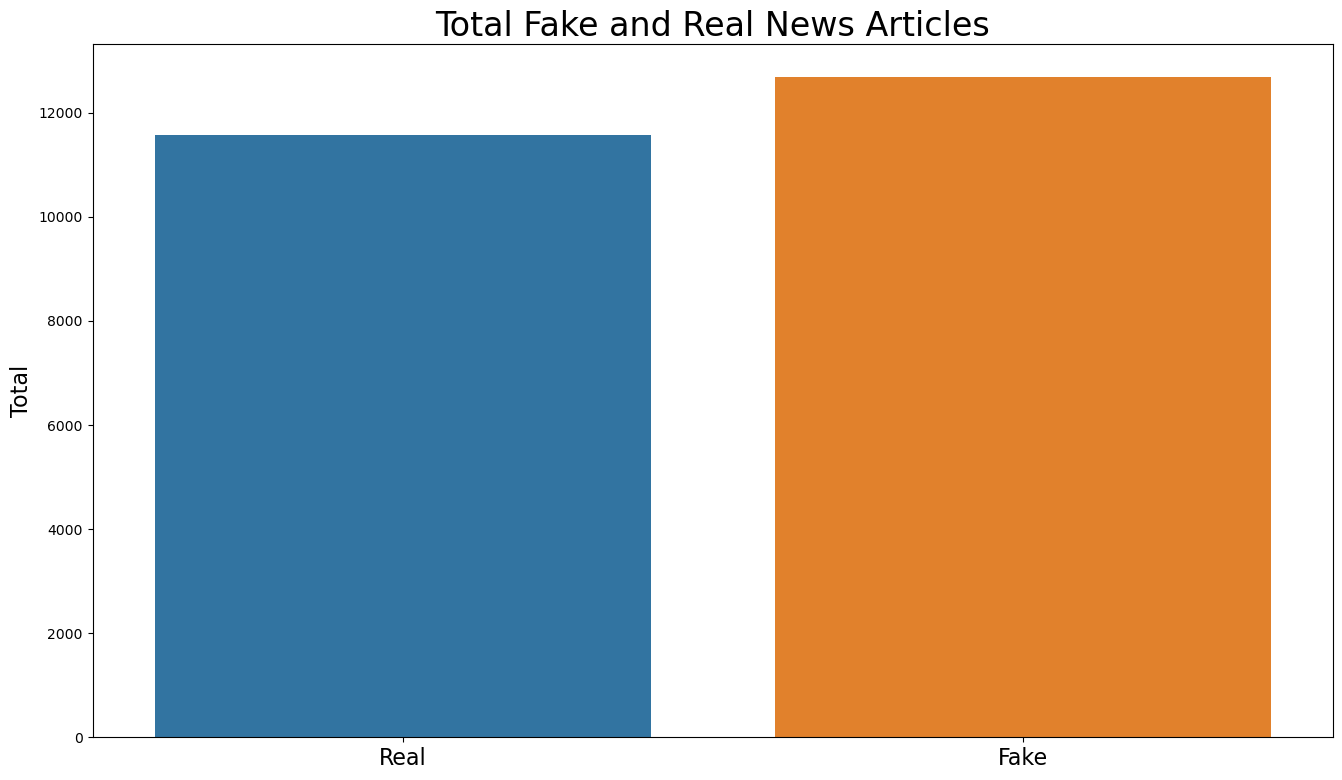

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))

#sns.countplot(df.label)
sns.countplot(data=df, x='label')

plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([1, 0], ['Fake', 'Real'], fontsize=16)

plt.show()

# Vectorization

In [30]:
X_train = df['total']
Y_train = df['label']

In [31]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [32]:
tf_idf_matrix

<24245x160226 sparse matrix of type '<class 'numpy.float64'>'
	with 4154555 stored elements in Compressed Sparse Row format>

# Modeling

In [33]:
test_counts = count_vectorizer.transform(df['total'].values)
test_tfidf = tfidf.transform(test_counts)

from sklearn.model_selection import StratifiedShuffleSplit

# Sample data (replace this with your dataset)
X = tf_idf_matrix  # Features
y = Y_train    # Target labels (0 or 1)

# Create an instance of StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
sss.get_n_splits(X, y)

# Perform the split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Now, X_train and y_train contain the training data and labels, and X_test and y_test contain the test data and labelss


In [34]:
print(X_train.shape, X_test.shape)

(19396, 160226) (4849, 160226)


In [35]:
print(y_train.shape, y_test.shape)

(19396,) (4849,)


In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Training and Evaluation

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Model Precison:  0.9956556082148499
Model Recall Score:  0.9940851735015773
Model F1 Score:  0.994869771112865
Model Accuracy Score:  0.9946380697050938
classification_report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2313
           1       1.00      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



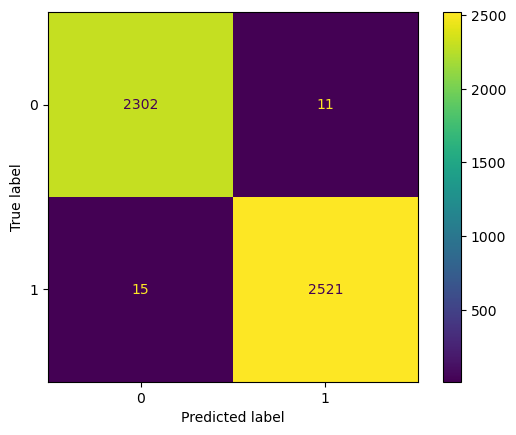

In [37]:
# DEMO
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('====================================')
print('Model Precison: ', precision_score(y_test, pred))
print('Model Recall Score: ', recall_score(y_test, pred))
print('Model F1 Score: ', f1_score(y_test, pred))
print('Model Accuracy Score: ', accuracy_score(y_test, pred))
print('====================================')
print('classification_report: ')
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [38]:
def get_evaluation_result(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    mcc = matthews_corrcoef(y_test, pred)
    kappa = cohen_kappa_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('Accuracy of Logistic classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
    print('Accuracy of Logistic classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    print('====================================')
    # Print the results
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Matthews Correlation Coefficient: {mcc}")
    print(f"Cohen's Kappa: {kappa}")
    print(f"AUC-ROC: {roc_auc}")
    print('====================================')
    print('classification_report: ')
    print(classification_report(y_test, pred))
    
    cm = confusion_matrix(y_test, pred)
    cm
    ConfusionMatrixDisplay.from_predictions(y_test,pred)

# 1. “lbfgs” Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9853578057331408
Precision: 0.9869616752271829
Recall: 0.9850157728706624
F1 Score: 0.9859877639628971
Matthews Correlation Coefficient: 0.9706584058118515
Cohen's Kappa: 0.9706563333384757
AUC-ROC: 0.9853742936986257
classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



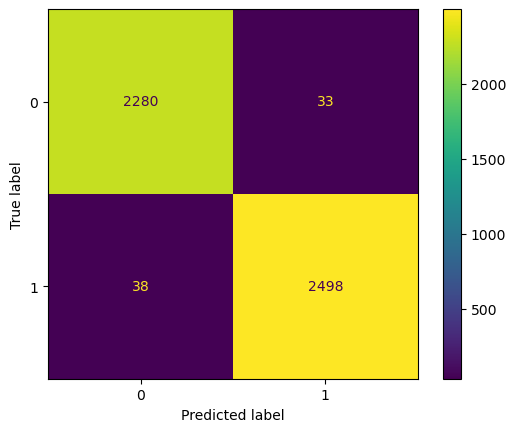

In [39]:
from sklearn.linear_model import LogisticRegression
lbfgs = LogisticRegression(solver='lbfgs')

get_evaluation_result(lbfgs, X_train, X_test, y_train, y_test)

# 2. “liblinear” Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9853578057331408
Precision: 0.9869616752271829
Recall: 0.9850157728706624
F1 Score: 0.9859877639628971
Matthews Correlation Coefficient: 0.9706584058118515
Cohen's Kappa: 0.9706563333384757
AUC-ROC: 0.9853742936986257
classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



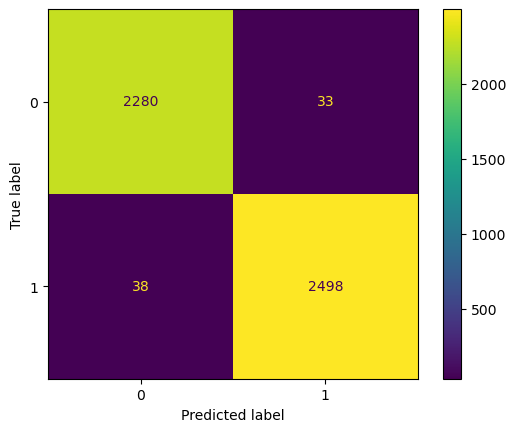

In [40]:
liblinear = LogisticRegression(solver='liblinear')

get_evaluation_result(liblinear, X_train, X_test, y_train, y_test)

# 3. “newton-cg” Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9853578057331408
Precision: 0.9869616752271829
Recall: 0.9850157728706624
F1 Score: 0.9859877639628971
Matthews Correlation Coefficient: 0.9706584058118515
Cohen's Kappa: 0.9706563333384757
AUC-ROC: 0.9853742936986257
classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



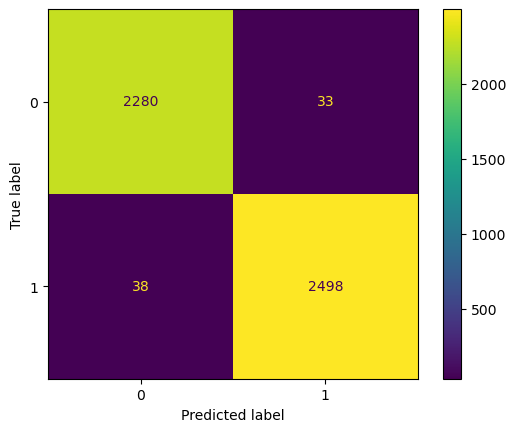

In [41]:
newton_cg = LogisticRegression(solver='newton-cg')

get_evaluation_result(newton_cg, X_train, X_test, y_train, y_test)

# 4. “sag” Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9853578057331408
Precision: 0.9869616752271829
Recall: 0.9850157728706624
F1 Score: 0.9859877639628971
Matthews Correlation Coefficient: 0.9706584058118515
Cohen's Kappa: 0.9706563333384757
AUC-ROC: 0.9853742936986257
classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



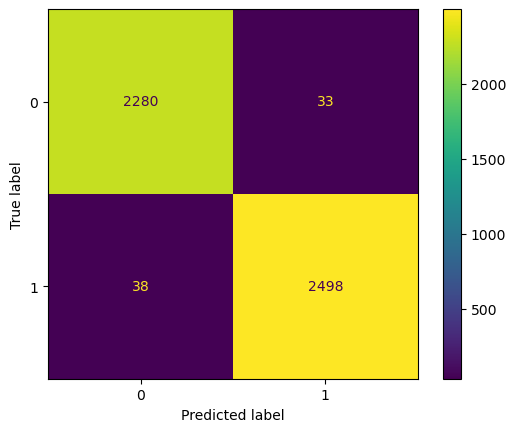

In [42]:
sag = LogisticRegression(solver='sag')

get_evaluation_result(sag, X_train, X_test, y_train, y_test)

# 5. Random Forest Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.989688595586719
Precision: 0.9920823436262867
Recall: 0.9881703470031545
F1 Score: 0.9901224812327143
Matthews Correlation Coefficient: 0.9793457721853749
Cohen's Kappa: 0.9793374096602915
AUC-ROC: 0.9897617839641799
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



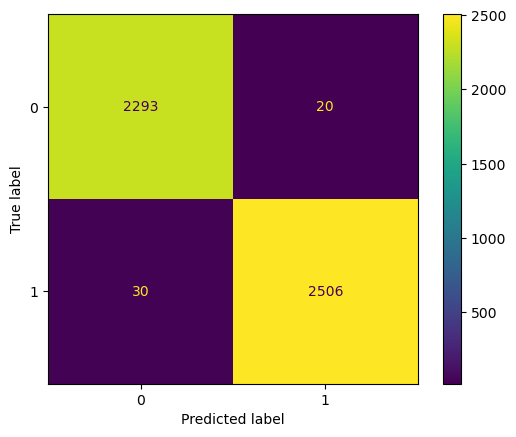

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

get_evaluation_result(rf, X_train, X_test, y_train, y_test)

# 6. Perceptron

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9905135079397814
Precision: 0.9893867924528302
Recall: 0.9925078864353313
F1 Score: 0.9909448818897638
Matthews Correlation Coefficient: 0.9809892763394678
Cohen's Kappa: 0.9809839116803152
AUC-ROC: 0.9904173673421793
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



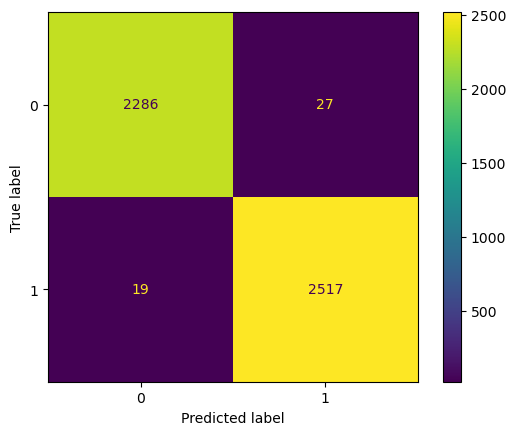

In [44]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=0)
get_evaluation_result(perceptron, X_train, X_test, y_train, y_test)

# 7. RidgeClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.994019385440297
Precision: 0.9952587909917029
Recall: 0.9932965299684543
F1 Score: 0.9942766923228734
Matthews Correlation Coefficient: 0.9880166682229169
Cohen's Kappa: 0.9880145586875464
AUC-ROC: 0.9940542312617888
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2313
           1       1.00      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



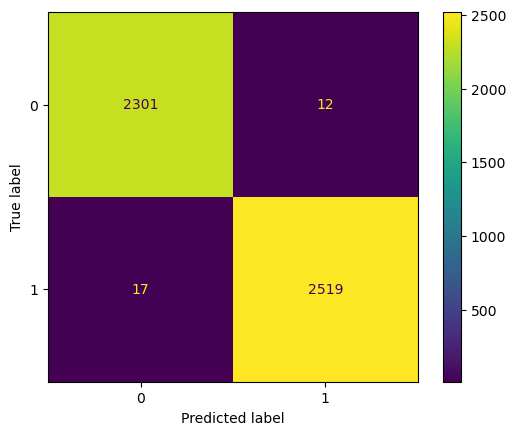

In [45]:
from sklearn.linear_model import RidgeClassifier
ridge_classifier = RidgeClassifier(alpha=1.0, solver='auto', random_state=0)
get_evaluation_result(ridge_classifier, X_train, X_test, y_train, y_test)

# 8. CatBoostClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9971128067642813
Precision: 0.9996038034865293
Recall: 0.9948738170347003
F1 Score: 0.9972332015810277
Matthews Correlation Coefficient: 0.9942269187124921
Cohen's Kappa: 0.99421469460412
AUC-ROC: 0.9972207390404804
classification_report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2313
           1       1.00      0.99      1.00      2536

    accuracy                           1.00      4849
   macro avg       1.00      1.00      1.00      4849
weighted avg       1.00      1.00      1.00      4849



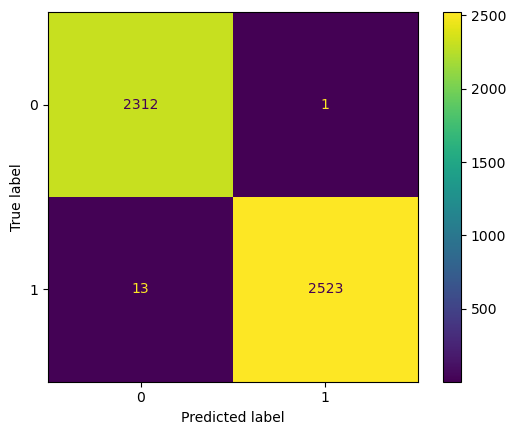

In [46]:
from catboost import CatBoostClassifier
# Create a CatBoostClassifier instance with specified hyperparameters
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=0)

get_evaluation_result(catboost_classifier, X_train, X_test, y_train, y_test)

# 9. NearestCentroidClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9375128892555166
Precision: 0.936986301369863
Recall: 0.944006309148265
F1 Score: 0.9404832056570418
Matthews Correlation Coefficient: 0.874742647100505
Cohen's Kappa: 0.8747156527688089
AUC-ROC: 0.9371998687980841
classification_report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2313
           1       0.94      0.94      0.94      2536

    accuracy                           0.94      4849
   macro avg       0.94      0.94      0.94      4849
weighted avg       0.94      0.94      0.94      4849



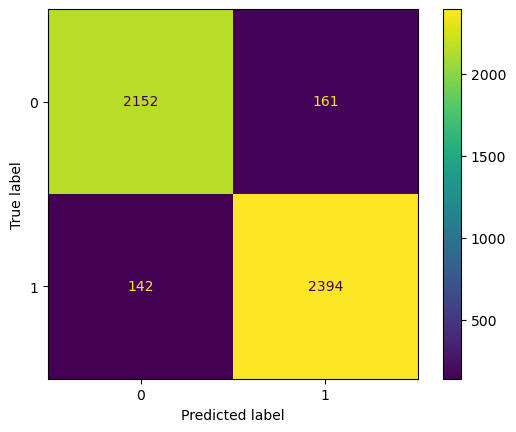

In [47]:
from sklearn.neighbors import NearestCentroid
ncc = NearestCentroid()

get_evaluation_result(ncc, X_train, X_test, y_train, y_test)

# 10. Stochastic Gradient Descent (SGDClassifier)

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9927820169107032
Precision: 0.9940734887396286
Recall: 0.9921135646687698
F1 Score: 0.9930925597000199
Matthews Correlation Coefficient: 0.9855369164499076
Cohen's Kappa: 0.9855348122091078
AUC-ROC: 0.9928142401813369
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



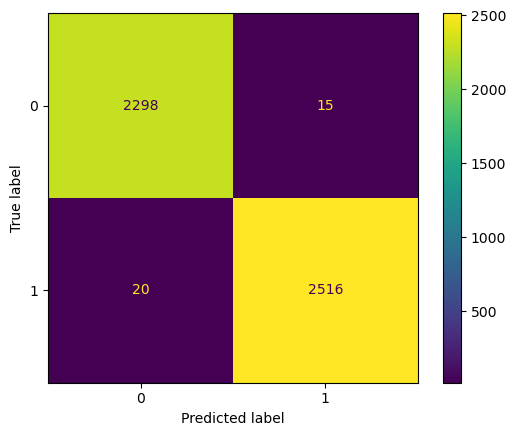

In [48]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()

get_evaluation_result(sgd_classifier, X_train, X_test, y_train, y_test)

# 11. SVC (kernel=”linear”, C=0.025):

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9703031552897504
Precision: 0.9761146496815286
Recall: 0.9668769716088328
F1 Score: 0.9714738510301109
Matthews Correlation Coefficient: 0.9405538054892703
Cohen's Kappa: 0.9405075689569501
AUC-ROC: 0.9704683171922244
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2313
           1       0.98      0.97      0.97      2536

    accuracy                           0.97      4849
   macro avg       0.97      0.97      0.97      4849
weighted avg       0.97      0.97      0.97      4849



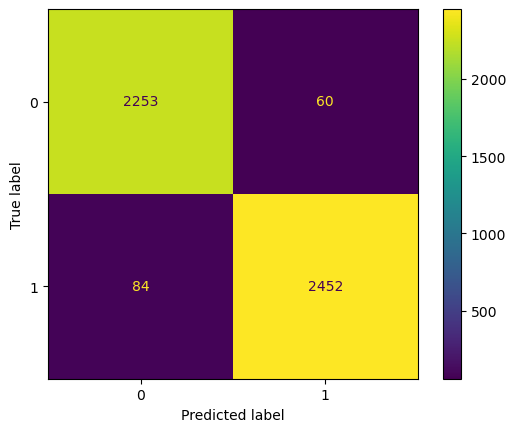

In [49]:
from sklearn.svm import SVC
svm_lin = SVC(kernel="linear", C=0.025)

get_evaluation_result(svm_lin, X_train, X_test, y_train, y_test)

# 12. SVC (gama=2, C=1)

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.987420086615797
Precision: 0.9877808435159637
Recall: 0.9881703470031545
F1 Score: 0.9879755568697024
Matthews Correlation Coefficient: 0.9747864520255389
Cohen's Kappa: 0.9747863687551428
AUC-ROC: 0.9873839197186114
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



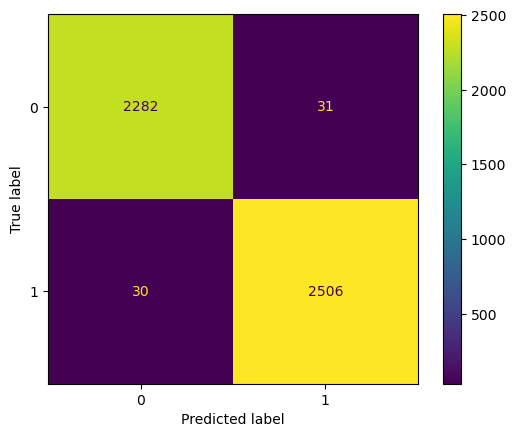

In [50]:
svm_rbf = SVC(kernel="rbf", gamma=2, C=1)

get_evaluation_result(svm_rbf, X_train, X_test, y_train, y_test)

# 13. LinearSVC

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9944318416168282
Precision: 0.994481671265274
Recall: 0.9948738170347003
F1 Score: 0.9946777054997044
Matthews Correlation Coefficient: 0.988839952608428
Cohen's Kappa: 0.9888398681375222
AUC-ROC: 0.9944105358411721
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



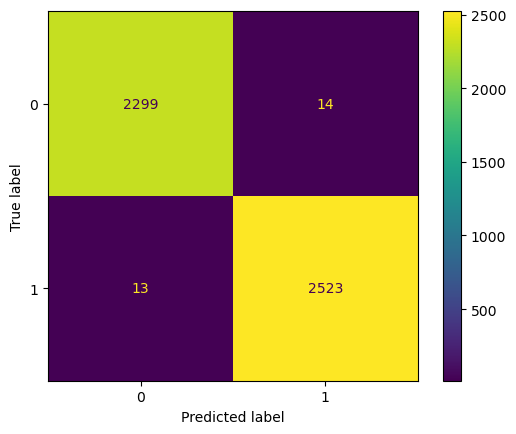

In [51]:
from sklearn.svm import LinearSVC
linear_svm_classifier = LinearSVC(C=1.0, random_state=0)

get_evaluation_result(linear_svm_classifier, X_train, X_test, y_train, y_test)

# 14. SDGClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9929882449989689
Precision: 0.9940758293838863
Recall: 0.9925078864353313
F1 Score: 0.9932912391475928
Matthews Correlation Coefficient: 0.9859491835305259
Cohen's Kappa: 0.9859478362023615
AUC-ROC: 0.9930114010646176
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



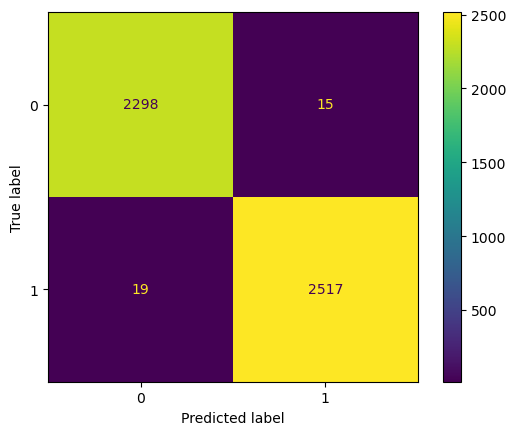

In [52]:
from sklearn.linear_model import SGDClassifier
# Create an SGDClassifier instance with hinge loss (SVM-like behavior), L2 regularization, and an initial learning rate (eta0)
sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, eta0=0.01, random_state=0, max_iter=1000)

get_evaluation_result(sgd_classifier, X_train, X_test, y_train, y_test)

# 15. ZeroR

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.5229944318416169
Precision: 0.5229944318416169
Recall: 1.0
F1 Score: 0.6867975626269466
Matthews Correlation Coefficient: 0.0
Cohen's Kappa: 0.0
AUC-ROC: 0.5
classification_report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2313
           1       0.52      1.00      0.69      2536

    accuracy                           0.52      4849
   macro avg       0.26      0.50      0.34      4849
weighted avg       0.27      0.52      0.36      4849



C:\Users\Dac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


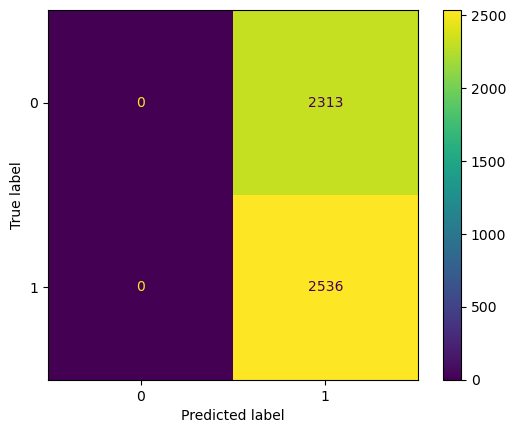

In [53]:
from sklearn.dummy import DummyClassifier

# Create a ZeroR classifier
zeror_model = DummyClassifier(strategy="most_frequent")

get_evaluation_result(zeror_model, X_train, X_test, y_train, y_test)

# 16. DecisionTreeClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9964941224994844
Precision: 0.9968441814595661
Recall: 0.9964511041009464
F1 Score: 0.9966476040228753
Matthews Correlation Coefficient: 0.9929736022585612
Cohen's Kappa: 0.9929735174409907
AUC-ROC: 0.9964961962355143
classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2313
           1       1.00      1.00      1.00      2536

    accuracy                           1.00      4849
   macro avg       1.00      1.00      1.00      4849
weighted avg       1.00      1.00      1.00      4849



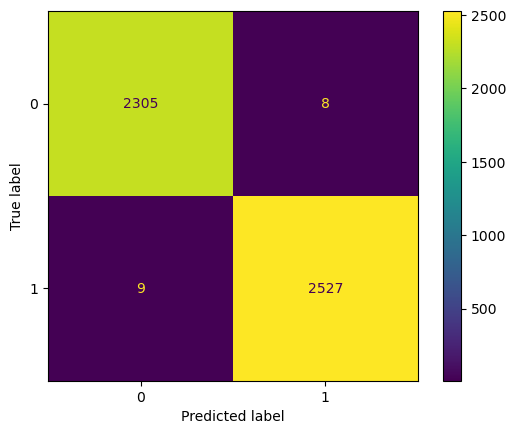

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)

get_evaluation_result(dt_classifier, X_train, X_test, y_train, y_test)

# 17.Passive Aggressive (PassiveAggressiveClassifier)

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9944318416168282
Precision: 0.9952625345440189
Recall: 0.9940851735015773
F1 Score: 0.9946735056224106
Matthews Correlation Coefficient: 0.9888414767667663
Cohen's Kappa: 0.9888407166427794
AUC-ROC: 0.9944485530283503
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2313
           1       1.00      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



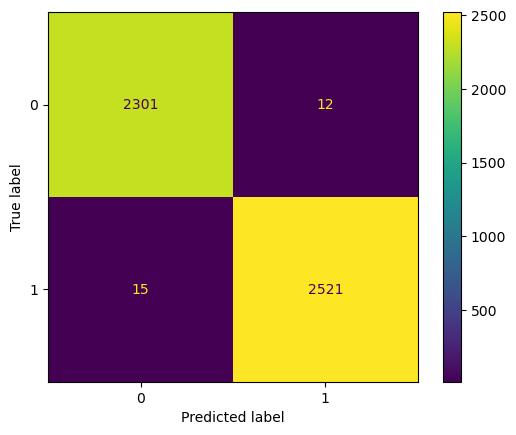

In [55]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_classifier = PassiveAggressiveClassifier(C=1.0, random_state=0, max_iter=1000)

get_evaluation_result(pa_classifier, X_train, X_test, y_train, y_test)

# 18.ExtraTreeClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9797896473499691
Precision: 0.9915322580645162
Recall: 0.9696372239747634
F1 Score: 0.9804625199362041
Matthews Correlation Coefficient: 0.9597932945816056
Cohen's Kappa: 0.9595366971320903
AUC-ROC: 0.9802790529731145
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2313
           1       0.99      0.97      0.98      2536

    accuracy                           0.98      4849
   macro avg       0.98      0.98      0.98      4849
weighted avg       0.98      0.98      0.98      4849



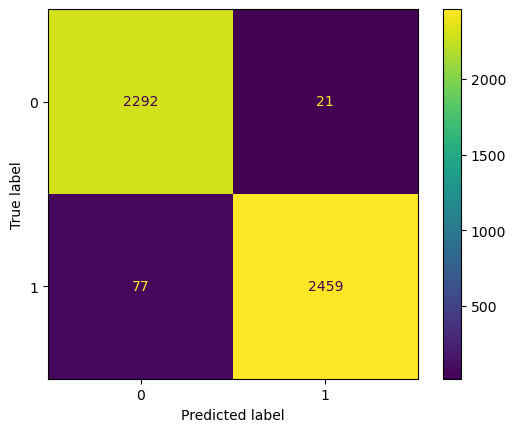

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)

get_evaluation_result(extra_tree_classifier, X_train, X_test, y_train, y_test)

# 19.Random Patches

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9975252629408126
Precision: 0.9992088607594937
Recall: 0.9960567823343849
F1 Score: 0.9976303317535546
Matthews Correlation Coefficient: 0.9950462280414316
Cohen's Kappa: 0.9950407898190793
AUC-ROC: 0.9975960522134527
classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2313
           1       1.00      1.00      1.00      2536

    accuracy                           1.00      4849
   macro avg       1.00      1.00      1.00      4849
weighted avg       1.00      1.00      1.00      4849



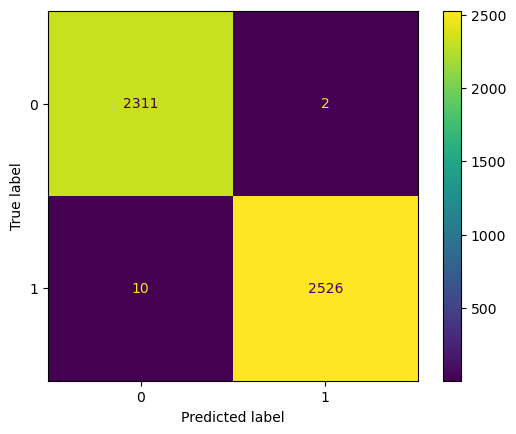

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a base learner (e.g., Decision Tree)
base_learner = DecisionTreeClassifier()

# Create a BaggingClassifier with Random Patches
bagging = BaggingClassifier(base_learner, max_samples=0.8, max_features=0.8, n_estimators=10, random_state=42)

get_evaluation_result(bagging, X_train, X_test, y_train, y_test)

# 20.VotingClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.998350175293875
Precision: 0.998422712933754
Recall: 0.998422712933754
F1 Score: 0.998422712933754
Matthews Correlation Coefficient: 0.996693357118795
Cohen's Kappa: 0.996693357118795
AUC-ROC: 0.9983466785593975
classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2313
           1       1.00      1.00      1.00      2536

    accuracy                           1.00      4849
   macro avg       1.00      1.00      1.00      4849
weighted avg       1.00      1.00      1.00      4849



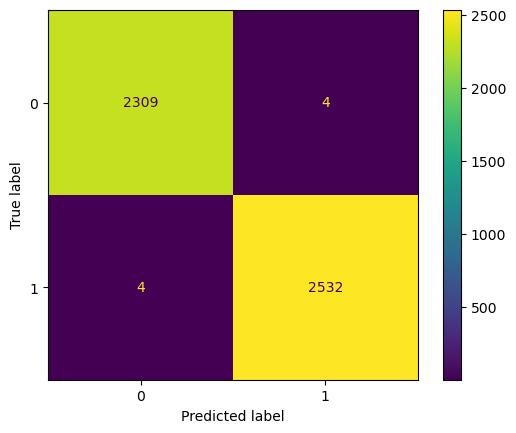

In [58]:
from sklearn.ensemble import VotingClassifier

# Define individual classifiers
classifier1 = DecisionTreeClassifier()
classifier2 = SVC(probability=True)  # Use probability=True for soft voting
classifier3 = RandomForestClassifier()

# Create a VotingClassifier instance with soft voting
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', classifier1),
    ('svm', classifier2),
    ('random_forest', classifier3)
], voting='soft')  # You can also use 'hard' for hard voting

get_evaluation_result(voting_classifier, X_train, X_test, y_train, y_test)

# 21. Stacked_generalization

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9975252629408126
Precision: 0.9972419227738377
Recall: 0.9980283911671924
F1 Score: 0.9976350019708317
Matthews Correlation Coefficient: 0.9950401871223267
Cohen's Kappa: 0.9950398471071316
AUC-ROC: 0.9975010092455072
classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2313
           1       1.00      1.00      1.00      2536

    accuracy                           1.00      4849
   macro avg       1.00      1.00      1.00      4849
weighted avg       1.00      1.00      1.00      4849



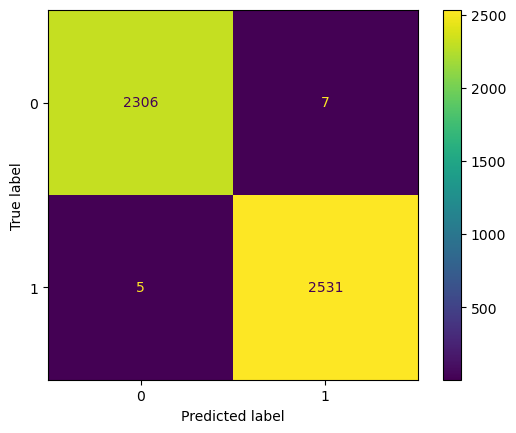

In [59]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=0)),
    ('svc', SVC(probability=True)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=0))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create a StackingClassifier instance
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

get_evaluation_result(stacked_model, X_train, X_test, y_train, y_test)

# 22.MLPClassifier:

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9919571045576407
Precision: 0.9952399841332804
Recall: 0.9893533123028391
F1 Score: 0.9922879177377891
Matthews Correlation Coefficient: 0.9839036106465423
Cohen's Kappa: 0.983884710888845
AUC-ROC: 0.9920826224289812
classification_report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2313
           1       1.00      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



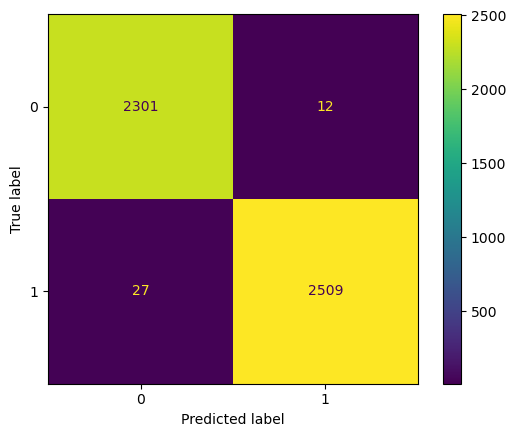

In [60]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier instance with specified architecture and hyperparameters
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=0)

get_evaluation_result(mlp_classifier, X_train, X_test, y_train, y_test)

# 23.BernoulliRBM:

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9991750876469375
Precision: 0.999605367008682
Recall: 0.9988170347003155
F1 Score: 0.9992110453648916
Matthews Correlation Coefficient: 0.9983470825049595
Cohen's Kappa: 0.9983467414116387
AUC-ROC: 0.9991923478732878
classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2313
           1       1.00      1.00      1.00      2536

    accuracy                           1.00      4849
   macro avg       1.00      1.00      1.00      4849
weighted avg       1.00      1.00      1.00      4849



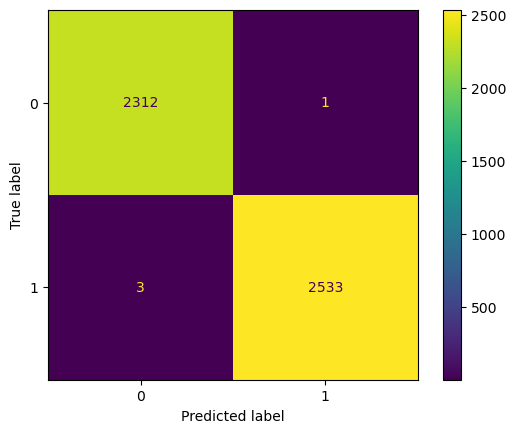

In [61]:
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100)

get_evaluation_result(lgb_classifier, X_train, X_test, y_train, y_test)

# 24.AdaBoostClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9979377191173437
Precision: 0.9992094861660079
Recall: 0.9968454258675079
F1 Score: 0.9980260560600079
Matthews Correlation Coefficient: 0.995870229516807
Cohen's Kappa: 0.9958671677544649
AUC-ROC: 0.9979903739800142
classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2313
           1       1.00      1.00      1.00      2536

    accuracy                           1.00      4849
   macro avg       1.00      1.00      1.00      4849
weighted avg       1.00      1.00      1.00      4849



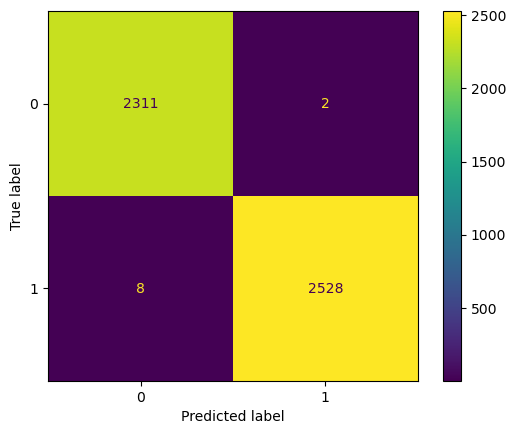

In [62]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=0)

get_evaluation_result(adaboost_classifier, X_train, X_test, y_train, y_test)

# 25.GradientBoostingClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9971128067642813
Precision: 0.9992082343626286
Recall: 0.9952681388012619
F1 Score: 0.9972342947451599
Matthews Correlation Coefficient: 0.9942229642646605
Cohen's Kappa: 0.9942144747048817
AUC-ROC: 0.9972017304468912
classification_report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2313
           1       1.00      1.00      1.00      2536

    accuracy                           1.00      4849
   macro avg       1.00      1.00      1.00      4849
weighted avg       1.00      1.00      1.00      4849



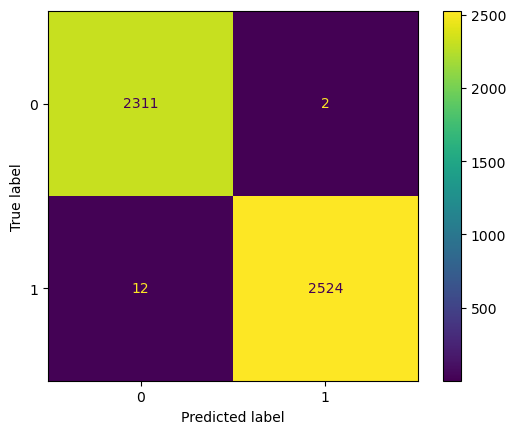

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

get_evaluation_result(gb_classifier, X_train, X_test, y_train, y_test)

# 26. Ordinal Learning Model

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9853578057331408
Precision: 0.9869616752271829
Recall: 0.9850157728706624
F1 Score: 0.9859877639628971
Matthews Correlation Coefficient: 0.9706584058118515
Cohen's Kappa: 0.9706563333384757
AUC-ROC: 0.9853742936986257
classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2313
           1       0.99      0.99      0.99      2536

    accuracy                           0.99      4849
   macro avg       0.99      0.99      0.99      4849
weighted avg       0.99      0.99      0.99      4849



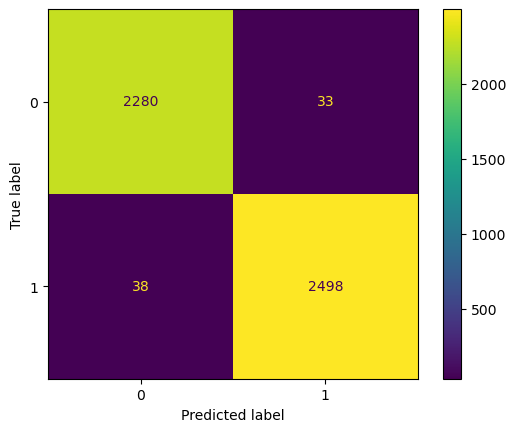

In [64]:
from mord import LogisticAT

# Create and train an Ordinal Logistic Regression model (LogisticAT)
ordinal_classifier = LogisticAT(alpha=1.0)  # You can adjust the regularization parameter alpha

get_evaluation_result(ordinal_classifier, X_train, X_test, y_train, y_test)

# 27.Xgboost

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9987626314704062
Precision: 0.9996050552922591
Recall: 0.9980283911671924
F1 Score: 0.9988161010260458
Matthews Correlation Coefficient: 0.9975215695308175
Cohen's Kappa: 0.997520206388652
AUC-ROC: 0.9987980261067264
classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2313
           1       1.00      1.00      1.00      2536

    accuracy                           1.00      4849
   macro avg       1.00      1.00      1.00      4849
weighted avg       1.00      1.00      1.00      4849



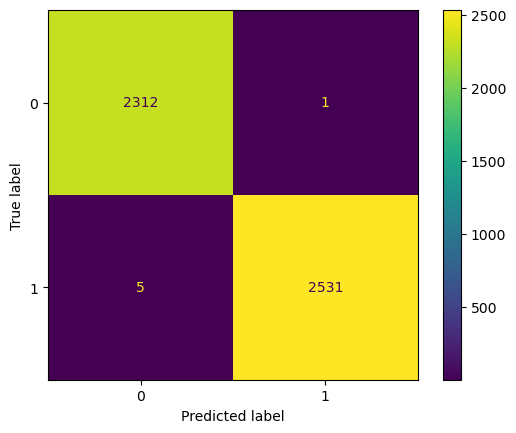

In [65]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBClassifier instance with specified hyperparameters
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

get_evaluation_result(xgb_classifier, X_train, X_test, y_train, y_test)

# 28.Decision Stump

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9962878944112188
Precision: 0.9992069785884219
Recall: 0.9936908517350158
F1 Score: 0.99644128113879
Matthews Correlation Coefficient: 0.9925786424714848
Cohen's Kappa: 0.992562032911398
AUC-ROC: 0.9964130869137682
classification_report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2313
           1       1.00      0.99      1.00      2536

    accuracy                           1.00      4849
   macro avg       1.00      1.00      1.00      4849
weighted avg       1.00      1.00      1.00      4849



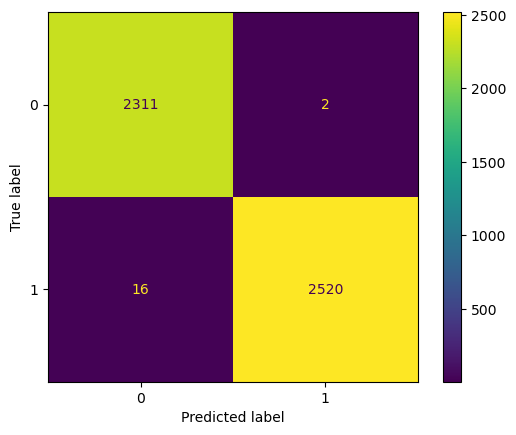

In [66]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Stump (a DecisionTreeClassifier with max_depth=1)
decision_stump = DecisionTreeClassifier(max_depth=1)

get_evaluation_result(decision_stump, X_train, X_test, y_train, y_test)

# 29.ComplementNB

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9439059599917509
Precision: 0.9492063492063492
Recall: 0.943217665615142
F1 Score: 0.9462025316455696
Matthews Correlation Coefficient: 0.8876277234151123
Cohen's Kappa: 0.8876083245619297
AUC-ROC: 0.9439391397682281
classification_report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2313
           1       0.95      0.94      0.95      2536

    accuracy                           0.94      4849
   macro avg       0.94      0.94      0.94      4849
weighted avg       0.94      0.94      0.94      4849



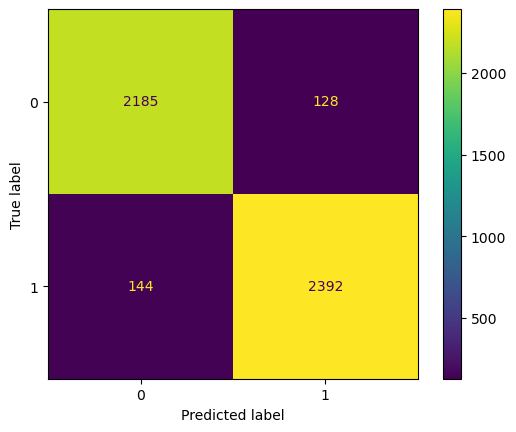

In [67]:
from sklearn.naive_bayes import ComplementNB

# Create a ComplementNB instance
complement_nb_classifier = ComplementNB()
get_evaluation_result(complement_nb_classifier, X_train, X_test, y_train, y_test)

# 30.MultinomialNB

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.99
Accuracy: 0.9428748195504227
Precision: 0.9448601811736904
Recall: 0.9459779179810726
F1 Score: 0.9454187192118226
Matthews Correlation Coefficient: 0.8855016416829512
Cohen's Kappa: 0.8855009608411722
AUC-ROC: 0.942725232228755
classification_report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2313
           1       0.94      0.95      0.95      2536

    accuracy                           0.94      4849
   macro avg       0.94      0.94      0.94      4849
weighted avg       0.94      0.94      0.94      4849



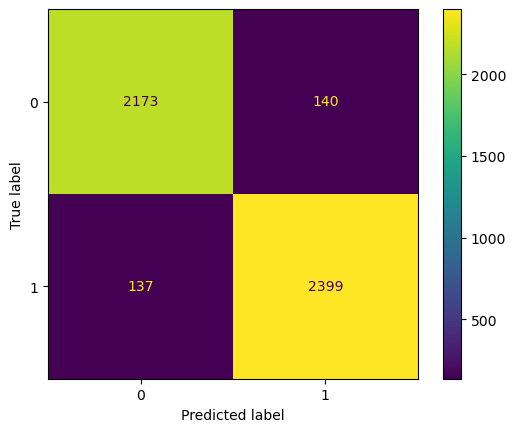

In [68]:
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB instance
multinomial_nb_classifier = MultinomialNB()
get_evaluation_result(multinomial_nb_classifier, X_train, X_test, y_train, y_test)